# Online Shoppers Purchase Intention

## <b><u>Objective</u></b>: 
### To develop a model that predicts the online shoppers purchase intention, i.e., to predict whether a customer visit to the online website leads to a purchase ( Revenue Generation ) or not.<br>


    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df.shape

(12330, 18)

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [201]:

ticks1 = ["Not Purchased","Purchased"]
ticks2 = ['False', 'True']
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = int(y_value)
        #label = float("{0:.2f}".format(y_value))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',
            size = 13,                   # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

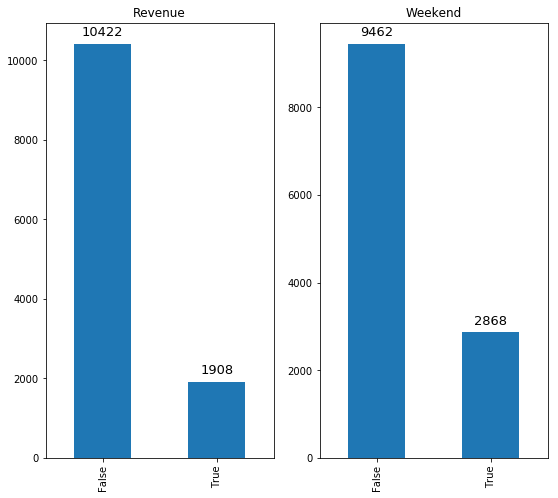

In [5]:
 fig, axes = plt.subplots(1,2, figsize=(9, 8))
ax1 = df['Revenue'].value_counts().plot(kind = 'bar', ax = axes[0], title = 'Revenue')
ax2 = df['Weekend'].value_counts().plot(kind = 'bar', ax = axes[1], title = 'Weekend')

add_value_labels(ax1)
add_value_labels(ax2)

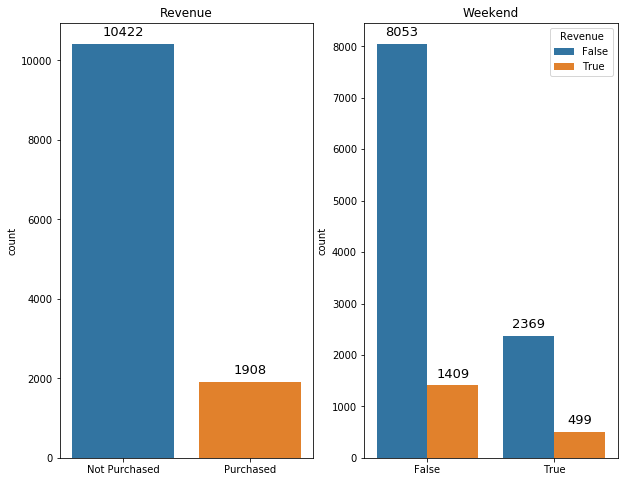

In [76]:

fig, axes = plt.subplots(1,2, figsize=(10, 8))
ax1 = sns.countplot(x='Revenue', data = df,ax = axes[0])
ax1.set_title("Revenue")
ax1.set_xlabel("")
ax1.set_xticklabels(ticks)
ax2 = sns.countplot(x='Weekend',hue = 'Revenue', data = df, ax = axes[1])
ax2.set_title("Weekend")
ax2.set_xlabel("")
ax2.set_xticklabels(ticks2)


add_value_labels(ax1)
add_value_labels(ax2)

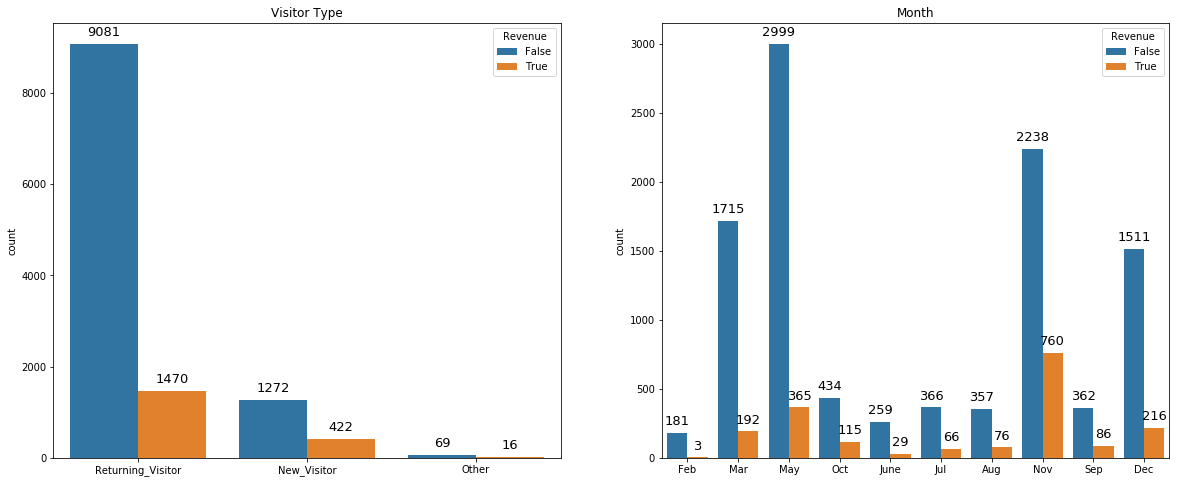

In [208]:
fig, axes = plt.subplots(1,2, figsize=(20,8))
ax1 = sns.countplot(x='VisitorType', hue='Revenue' ,data = df,ax = axes[0])
ax1.set_title("Visitor Type")
ax1.set_xlabel("")
#ax1.set_xticklabels(ticks)
ax2 = sns.countplot(x='Month',hue='Revenue' , data = df, ax = axes[1], )
ax2.set_title("Month")
ax2.set_xlabel("")
#ax2.set_xticklabels(ticks2)



add_value_labels(ax1)
add_value_labels(ax2)


In [24]:
Stats = df[['Administrative_Duration','Informational_Duration', 'ProductRelated_Duration',
           'BounceRates', 'ExitRates', 'PageValues']]
Stats.describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000
75%,93.256250,0.000000,1464.157213,0.016813,0.050000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742


Text(0.5, 0, '')

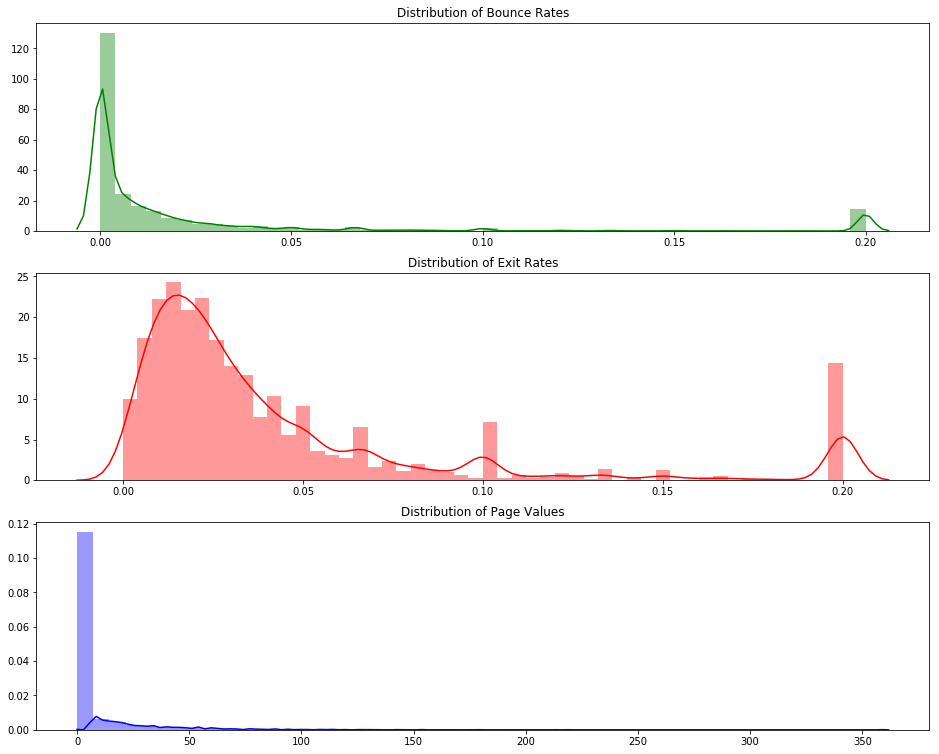

In [43]:

fig, axes = plt.subplots(3,1, figsize=(16,13))
ax1 = sns.distplot(df["BounceRates"],color="green",ax = axes[0])
ax1.set_title("Distribution of Bounce Rates")
ax1.set_xlabel("")

ax2 = sns.distplot(df["ExitRates"],color="red",ax = axes[1])
ax2.set_title("Distribution of Exit Rates")
ax2.set_xlabel("")

ax3 = sns.distplot(df["PageValues"],color="blue",ax = axes[2])
ax3.set_title("Distribution of Page Values")
ax3.set_xlabel("")



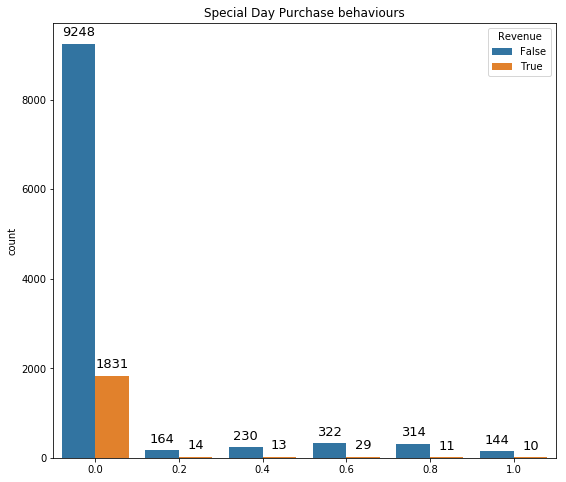

In [230]:
plt.figure(figsize=(9,8))
ax = sns.countplot(x='SpecialDay',hue='Revenue' ,data=df)
ax.set_title("Special Day Purchase behaviours")
ax.set_xlabel("")
add_value_labels(ax)


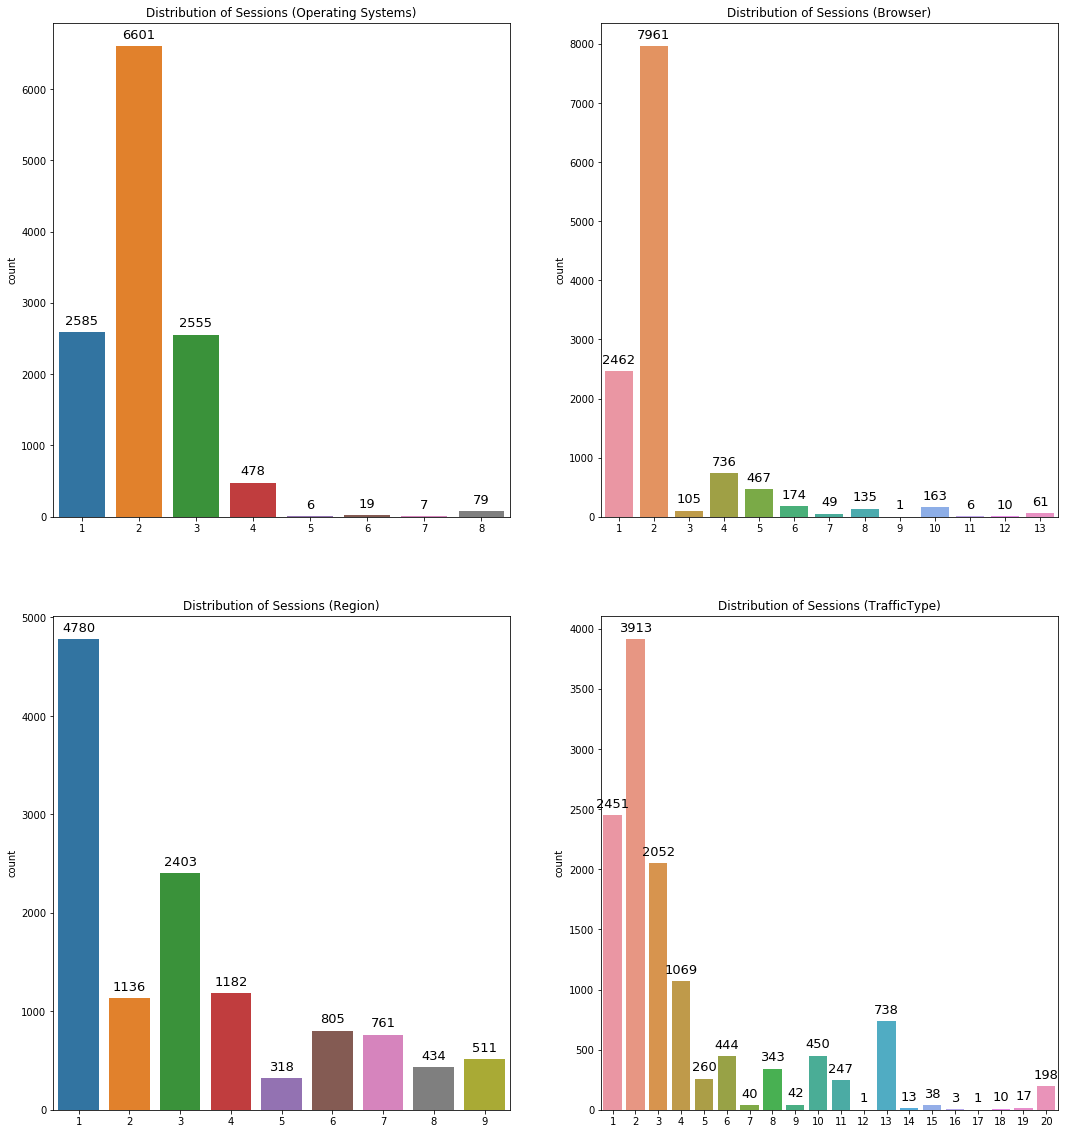

In [229]:
fig, axes = plt.subplots(2,2, figsize=(18,20))
ax1 = sns.countplot(x= df["OperatingSystems"],data = df,ax = axes[0,0])
ax1.set_title("Distribution of Sessions (Operating Systems)")
ax1.set_xlabel("")

ax2 = sns.countplot(x= df["Browser"],data = df,ax = axes[0,1])
ax2.set_title("Distribution of Sessions (Browser)")
ax2.set_xlabel("")

ax3 = sns.countplot(x= df["Region"],data = df,ax = axes[1,0])
ax3.set_title("Distribution of Sessions (Region)")
ax3.set_xlabel("")

ax4 = sns.countplot(x= df["TrafficType"],data = df,ax = axes[1,1])
ax4.set_title("Distribution of Sessions (TrafficType)")
ax4.set_xlabel("")

add_value_labels(ax1)
add_value_labels(ax2)
add_value_labels(ax3)
add_value_labels(ax4)

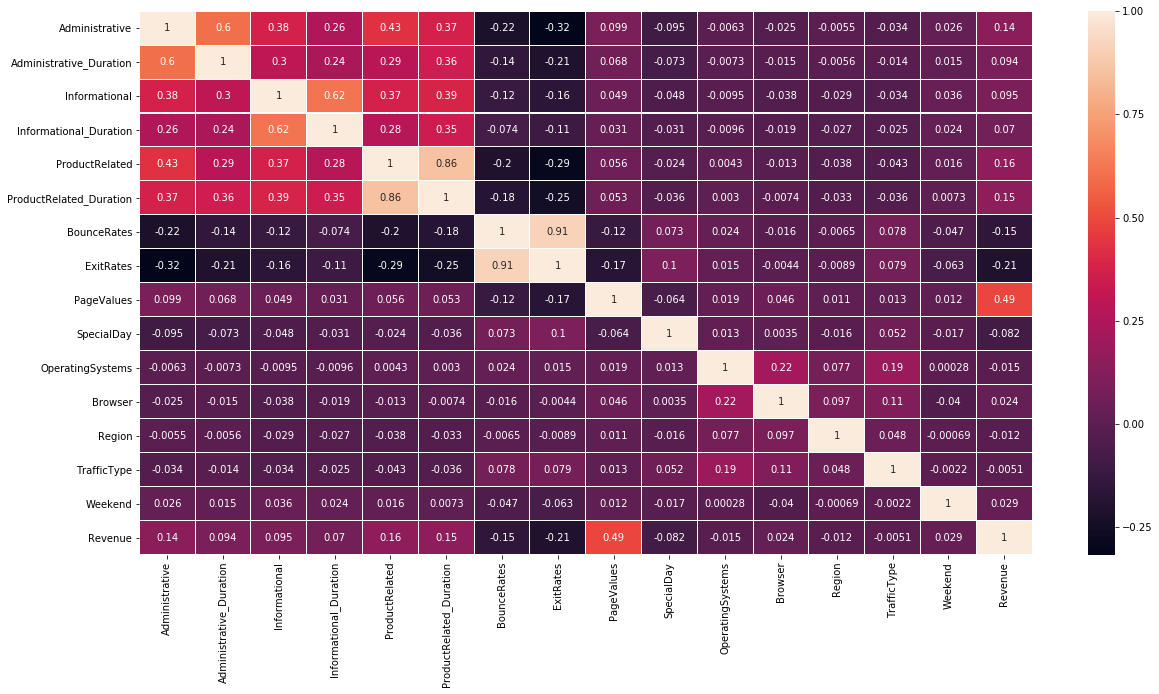

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,linewidths=.05)

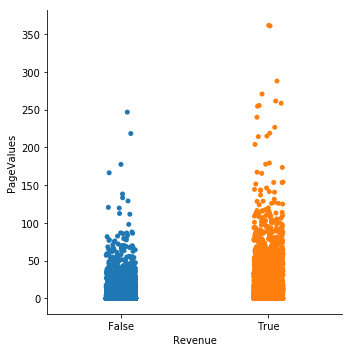

In [275]:
sns.catplot(x="Revenue", y="PageValues", data=df)

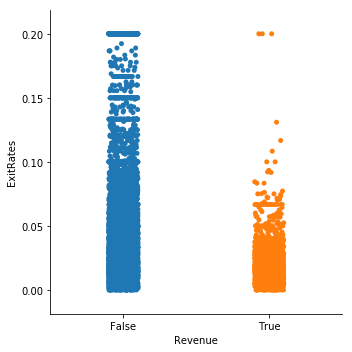

In [274]:
sns.catplot(x="Revenue", y="ExitRates", data=df)

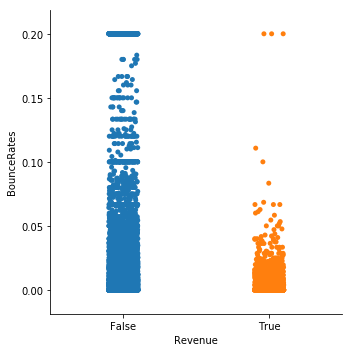

In [273]:
sns.catplot(x="Revenue", y="BounceRates", data=df)

# Holdout Split - Train (0.70) and Test (0.30)

In [163]:
df2 = df.drop(['Revenue'], axis=1)

X = pd.get_dummies(df2,drop_first=True)

X.Weekend = X.Weekend.astype(int)

X.head()

y = df['Revenue']

In [164]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [165]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [166]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

scalar = StandardScaler()
X = scalar.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Function for calculating accuracy
def accuracy(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(y_pred,y_test)
    acc = ((result[0][0]+result[1][1])/(len(y_test)))*100
    return acc

## Support Vector Machine


 Building Support Vector Machine

 Testing Accuracy of SVM:  88.835


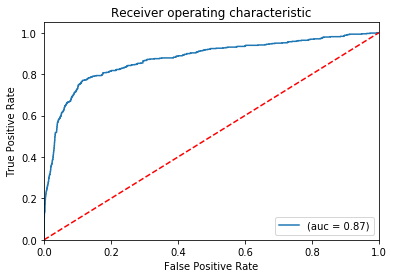

              precision    recall  f1-score   support

       False       0.90      0.97      0.94      3124
        True       0.73      0.45      0.55       575

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.82      0.71      0.74      3699
weighted avg       0.88      0.89      0.88      3699



In [167]:
print("\n Building Support Vector Machine")
from sklearn.svm import SVC
svc = SVC(probability=True)
model = svc.fit(X_train,y_train)
y_pred_svc = model.predict(X_test)
print("\n Testing Accuracy of SVM: ",round(accuracy(y_test,y_pred_svc),3))

roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
cr=classification_report(y_test, y_pred_svc)


probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
#roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

## Logistic Regression


 Building Logistic Regression

 Testing Accuracy of Logistic Regression:  88.348


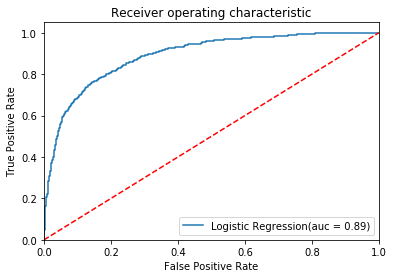

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      3124
        True       0.77      0.36      0.49       575

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.83      0.67      0.71      3699
weighted avg       0.87      0.88      0.87      3699



In [168]:
print("\n Building Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)

print("\n Testing Accuracy of Logistic Regression: ",round(accuracy(y_test,y_pred_lr),3))

roc=roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])
cr=classification_report(y_test, y_pred_lr)


probs = model_lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
#roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

## Random Forest


 Testing of Random Forest:  89.835


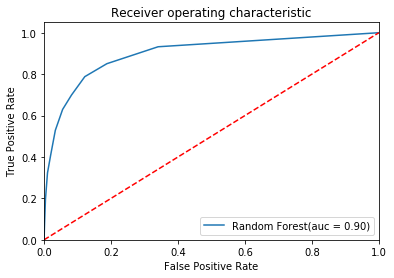

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      3124
        True       0.74      0.53      0.62       575

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699



In [80]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train,y_train)
y_pred_enrf = model_rf.predict(X_test)

print("\n Testing of Random Forest: ",round(accuracy(y_test,y_pred_enrf),3))

roc=roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])
cr=classification_report(y_test, y_pred_enrf)


probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
#roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

## Neural Networks

In [84]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense


model_nn = Sequential()
model_nn.add(Dense(units = 128, activation = 'relu', input_dim = 26))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(Dropout(0.25))
model_nn.add(Dense(units = 1, activation = 'sigmoid'))
model_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_nn.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose=False)
    

'''
model = KerasClassifier(build_fn = Make_Classifier)
params = {'batch_size':[25,35],
          'epochs':[100,150],
          'optimizer':['adam','rmsprop']
          }

optimization = GridSearchCV(estimator = model, param_grid = params, scoring = 'accuracy', cv=10)
optimization_model = optimization.fit(X_train, y_train)
Best_Params = optimization_model.best_params_
Best_Score = optimization_model.best_score_
print("Best_Params:", Best_Params)
print("Best_Score:", Best_Score)

'''


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


'\nmodel = KerasClassifier(build_fn = Make_Classifier)\nparams = {\'batch_size\':[25,35],\n          \'epochs\':[100,150],\n          \'optimizer\':[\'adam\',\'rmsprop\']\n          }\n\noptimization = GridSearchCV(estimator = model, param_grid = params, scoring = \'accuracy\', cv=10)\noptimization_model = optimization.fit(X_train, y_train)\nBest_Params = optimization_model.best_params_\nBest_Score = optimization_model.best_score_\nprint("Best_Params:", Best_Params)\nprint("Best_Score:", Best_Score)\n\n'


 Testing Accuracy of Neural Network:  88.348


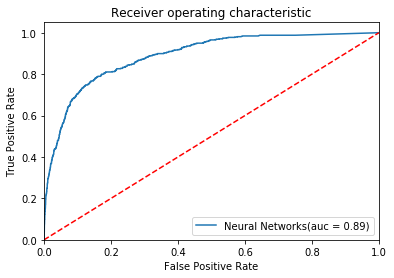

              precision    recall  f1-score   support

       False       0.92      0.94      0.93      3124
        True       0.64      0.58      0.61       575

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.78      0.76      0.77      3699
weighted avg       0.88      0.88      0.88      3699



In [89]:
y_pred_nn = model_nn.predict_classes(X_test)
print("\n Testing Accuracy of Neural Network: ",round(accuracy(y_test,y_pred_nn),3))

roc=roc_auc_score(y_test, model_nn.predict_proba(X_test)[:,0])
cr=classification_report(y_test, y_pred_nn)


probs = model_nn.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr, threshold = roc_curve(y_test, preds)
#roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Neural Networks(auc = %0.2f)' % roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print(cr)

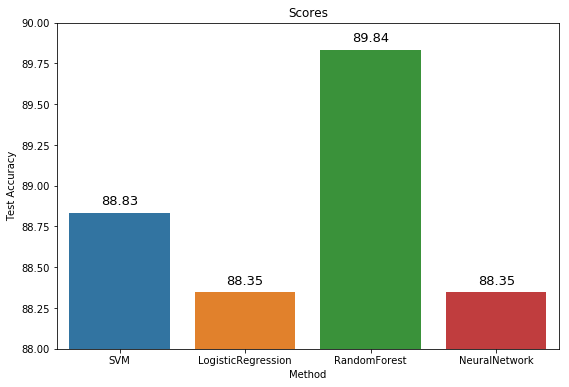

In [169]:
data= [['SVM',accuracy(y_test,y_pred_svc)],['LogisticRegression',accuracy(y_test,y_pred_lr)],
       ['RandomForest',accuracy(y_test,y_pred_enrf)],['NeuralNetwork',accuracy(y_test,y_pred_nn)]]
accuracy_compare = pd.DataFrame(data, columns = ['Method', 'Test Accuracy'])
plt.figure(figsize=(9,6))
ax = sns.barplot(x=accuracy_compare['Method'],y=accuracy_compare['Test Accuracy'])
ax.set_title('Scores')
ax.set_ylim(88,90)
add_value_labels(ax)



# StratifiedK-Fold Cross Validation

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

scalar = StandardScaler()
X = scalar.fit_transform(X)


# Function for calculating accuracy
def accuracy(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    result = confusion_matrix(y_pred,y_test)
    acc = ((result[0][0]+result[1][1])/(len(y_test)))*100
    return acc

## Support Vector Machine

Building Support Vector Machine
Mean Accuracy: 0.8922139517740584, Mean Precision: 0.7459572430495961, Mean Recall: 0.45964177459355204, Mean F1_Score: 0.5685040462251227


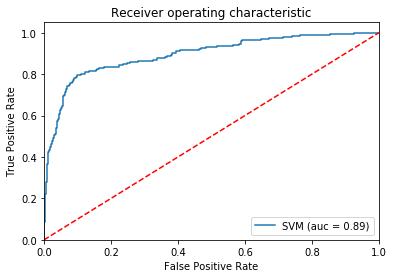

In [255]:

print("Building Support Vector Machine")
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
accs_SVM, precs_SVM, recs_SVM, f1_score_SVM = [], [], [], []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    clf =  SVC(probability = True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accs_SVM.append(acc)
    precs_SVM.append(prec)
    recs_SVM.append(rec)
    f1_score_SVM.append(f1)
    #print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')

print(f'Mean Accuracy: {np.mean(accs_SVM)}, Mean Precision: {np.mean(precs_SVM)}, Mean Recall: {np.mean(recs_SVM)}, Mean F1_Score: {np.mean(f1_score_SVM)}')

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='SVM (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

Building Logistic Regression
Mean Accuracy: 0.851661980740167, Mean Precision: 0.5145675605540936, Mean Recall: 0.7631027831358501, Mean F1_Score: 0.614411250886656


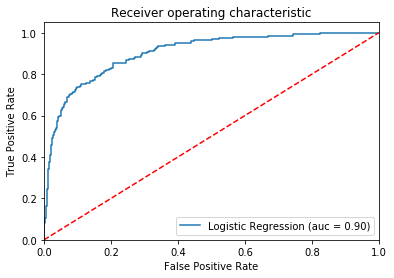

In [253]:
print("Building Logistic Regression")
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
accs_LR, precs_LR, recs_LR, f1_score_LR = [], [], [], []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    clf =  LogisticRegression(class_weight='balanced')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accs_LR.append(acc)
    precs_LR.append(prec)
    recs_LR.append(rec)
    f1_score_LR.append(f1)
    #print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')

print(f'Mean Accuracy: {np.mean(accs_LR)}, Mean Precision: {np.mean(precs_LR)}, Mean Recall: {np.mean(recs_LR)}, Mean F1_Score: {np.mean(f1_score_LR)}')

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


## Random Forest

Mean Accuracy: 0.8959448882626877, Mean Precision: 0.7332514558955181, Mean Recall: 0.5167732157619179, Mean F1_Score: 0.6056308656052198


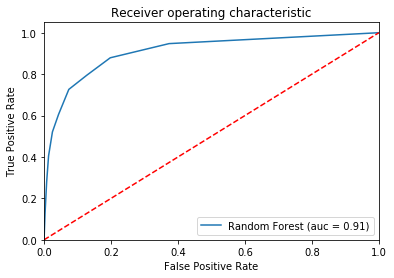

In [256]:
from sklearn.ensemble import RandomForestClassifier
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
accs_RF, precs_RF, recs_RF, f1_score_RF = [], [], [], []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    clf =  RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accs_RF.append(acc)
    precs_RF.append(prec)
    recs_RF.append(rec)
    f1_score_RF.append(f1)
    #print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')

print(f'Mean Accuracy: {np.mean(accs_RF)}, Mean Precision: {np.mean(precs_RF)}, Mean Recall: {np.mean(recs_RF)}, Mean F1_Score: {np.mean(f1_score_RF)}')

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Neural Networks

Mean Accuracy: 0.8920518121362656, Mean Precision: 0.6814124164939382, Mean Recall: 0.5717718379718931, Mean F1_Score: 0.6201346311583777


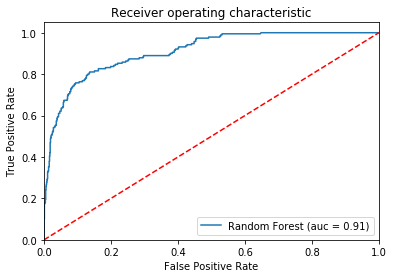

In [257]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
accs_NN, precs_NN, recs_NN , F1_Score_NN= [], [], [], []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    classifier = Sequential()
    classifier.add(Dense(units = 128, activation = 'relu', input_dim = 26))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dropout(0.25))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train, batch_size = 20, epochs = 100, verbose=False)
    y_pred = classifier.predict_classes(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    accs_NN.append(acc)
    precs_NN.append(prec)
    recs_NN.append(rec)
    F1_Score_NN.append(f1)
    #print(f'Accuracy: {acc}, Precision: {prec}, Recall: {rec}')

print(f'Mean Accuracy: {np.mean(accs_NN)}, Mean Precision: {np.mean(precs_NN)}, Mean Recall: {np.mean(recs_NN)}, Mean F1_Score: {np.mean(F1_Score_NN)}')

probs = classifier.predict_proba(X_test)
preds = probs[:,0]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



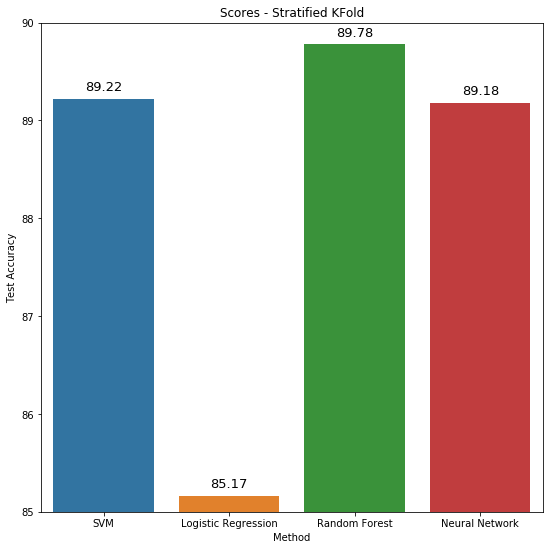

In [190]:
data= [['SVM',np.mean(accs_SVM)*100],['Logistic Regression',np.mean(accs_LR)*100]
       ,['Random Forest',np.mean(accs_RF)*100],['Neural Network',np.mean(accs_NN)*100]]
accuracy_compare = pd.DataFrame(data, columns = ['Method', 'Test Accuracy'])
plt.figure(figsize=(9,9))
ax = sns.barplot(x=accuracy_compare['Method'],y=accuracy_compare['Test Accuracy'])
ax.set_title('Scores - Stratified KFold')
ax.set_ylim(85,90)
add_value_labels(ax)